<a href="https://colab.research.google.com/github/Caavlier/Project-RealState/blob/main/Real_Estate_Clean_Up_Project_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Disclaimer: Ideally, create a repo on your github as your first project, download the files, this notebook and the single csv there or fork it.***

# **Real Estate Clean up**

This is a real dataset, and it was downloaded using web scraping techniques. The data contains registers from Fotocasa which is one of the most popular real estate websites in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and in no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

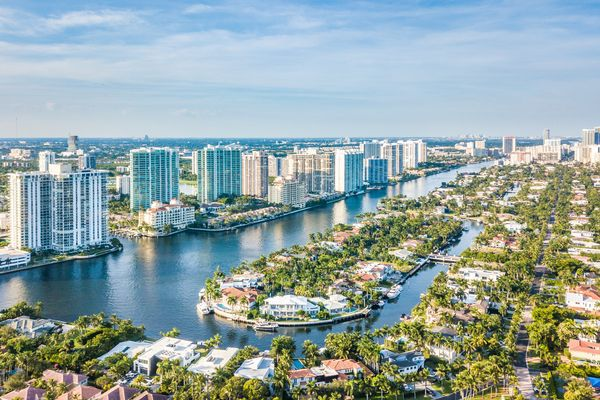

## **Preamble**



In [1]:
# Library for data manipulation, plotting and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# URL of the CSV file hosted on GitHub (raw content)
url = 'https://raw.githubusercontent.com/Caavlier/Proyect-RealState/refs/heads/main/real_estate.csv'

# Load the CSV file into a DataFrame (file uses semicolons < ; > as the delimiter instead of commas)
df = pd.read_csv(url, sep=';')

> **Understanding the Data:**

In [ ]:
# Display the first n rows of the DataFrame
df.head(n=10)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
5,6,153934794,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,70.0,315000,...,0,0,0,0,0,0,"40,53391","-3,89445",NaN,NaN
6,7,153848236,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,145.0,430000,...,0,0,0,0,0,0,"40,5105842135624","-3,89436578643763",NaN,NaN
7,8,153482331,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,95.0,275000,...,0,0,0,0,0,0,"40,53294","-3,89898",NaN,NaN
8,9,153885351,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,3.0,277.0,445000,...,0,0,0,0,0,0,"40,5363057864376","-3,89294421356237",NaN,NaN
9,10,153215459,False,modesta,NaN,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,129.0,350000,...,0,0,0,0,0,0,"40,37502","-3,74391",NaN,NaN


In [ ]:
# Check the columns in the DataFrame to understand the data
print(f"\nThe {df.shape[1]}-columns of the DataFrame are: \n{df.columns}")
print(f"\nThis is what we can find in an arbitrary row: \n{df.iloc[5]}") # row 6

# All rows have at least a NaN
print(f"\nOBSERVATION: If we remove all the rows with missing values, the resulting DataFrame  is: \n{df.dropna()}")


The 37-columns of the DataFrame are: 
Index(['Unnamed: 0', 'id_realEstates', 'isNew', 'realEstate_name',
       'phone_realEstate', 'url_inmueble', 'rooms', 'bathrooms', 'surface',
       'price', 'date', 'description', 'address', 'country', 'level1',
       'level2', 'level3', 'level4', 'level5', 'level6', 'level7', 'level8',
       'upperLevel', 'countryId', 'level1Id', 'level2Id', 'level3Id',
       'level4Id', 'level5Id', 'level6Id', 'level7Id', 'level8Id', 'accuracy',
       'latitude', 'longitude', 'zipCode', 'customZone'],
      dtype='object')

This is what we can find in an arbitrary row: 
Unnamed: 0                                                          6
id_realEstates                                              153934794
isNew                                                           False
realEstate_name                                               expimad
phone_realEstate                                          912780412.0
url_inmueble        https://www.fotocasa.es

## **Data extraction**

**Exercise 01.** Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [ ]:
# Work with 'price' to choose the most expensive house
# 'Unnamed: 0': ennumerate the DataFram starting at 1
Max = df['price'].idxmax() # Returns an index starting at 0,...

print(f"The {df.loc[Max,'Unnamed: 0']}-house with address {df.loc[Max,'address']} is the most expensive and its price is {df.loc[Max,'price']} USD")
df.iloc[Max]

The 13111-house with address El Escorial is the most expensive and its price is 8500000 USD


,13110
Unnamed: 0,13111
id_realEstates,132042636
isNew,False
realEstate_name,engel volkers torrelodones
phone_realEstate,911798512.0
url_inmueble,https://www.fotocasa.es/es/comprar/vivienda/vi...
rooms,19.0
bathrooms,NaN
surface,NaN
price,8500000


**Exercise 02.** Which is the cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [ ]:
# Work with 'price' to choose the cheapest house
Min = df['price'].idxmin()
print(f"The {df.loc[Min,'Unnamed: 0']}-house with address {df.loc[Min,'address']} is the cheapest and its price is {df.loc[Min,'price']} USD")

The 367-house with address Parla is the cheapest and its price is 0 USD


**Exercise 03.** Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

```The biggest house is located on Yukka Street Nº10 and its surface is 5000 meters```

```The smallest house is located on County Road 1 N and its surface is 200 meters```

In [ ]:
# Work with 'surface' to find the biggest house (area)
Max = df['surface'].idxmax()
Min = df['surface'].idxmin()

print(f"The {df.loc[Min,'Unnamed: 0']}-house with address {df.loc[Min,'address']} is the smallest and its surface is {df.loc[Min,'surface']} USD")
print(f"The {df.loc[Max,'Unnamed: 0']}-house with address {df.loc[Max,'address']} is the biggest and its surface is {df.loc[Max,'surface']} USD")

The 499-house with address Calle Amparo,  Madrid Capital is the smallest and its surface is 15.0 USD
The 6795-house with address Sevilla la Nueva is the biggest and its surface is 249000.0 USD


**Exercise 04.** How many distinct populations (level5 column) the dataset contains? (★☆☆)

Print the names of the populations with a comma as a separator. For example:

> print(populations)

`population1, population2, population3, ...`

In [ ]:
# Missing values in level5
p = df['level5'].nunique() # Count number of non-NaN elements in level5
Np = df['level5'].nunique(dropna=False) - p # Number of NaN elements
print(f"The dataset contains {p} distinct populations with {Np} missing values.")

populations = df['level5'].unique() # Array with only different elements in the series. Ej [2,2,1] --> [2,1]
print("\nThe names of the populations are:")
print(', '.join(populations)) # It joins all the array's elements into a single string

The dataset contains 168 distinct populations with 0 missing values.

The names of the populations are:
Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Medi

**Exercise 05.** Does the dataset contain NAs? (★☆☆)

Print a boolean value (True or False) followed by the rows/cols that contains NAs.

In [ ]:
# NOTE: All rows have missing values. Therefore, print "rows x boolean" will be redundant

dfB = df.isna() # Boolean-DataFrame with respect to NaN
dfB.any() # Returns the index of the columns with NaN values

# OBSERVATION: 'df.any()' indicates columns with at least one non-NaN

,0
Unnamed: 0,False
id_realEstates,False
isNew,False
realEstate_name,True
phone_realEstate,True
url_inmueble,False
rooms,True
bathrooms,True
surface,True
price,False


**Exercise 06.** Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions.

In [ ]:
# DataFrame without NaNs
nonNAN = df.dropna(axis=1)

print(f"Original dataset dimensions = {df.shape}")
print(f"Dataset without NaNs dimensions = {nonNAN.shape}")
nonNAN['level5'].isna()

Original dataset dimensions = (15335, 37)
Dataset without NaNs dimensions = (15335, 25)


,level5
0,False
1,False
2,False
3,False
4,False
...,...
15330,False
15331,False
15332,False
15333,False


**Exercise 07.** Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value.

In [ ]:
# DataFrame with a given condition
df_Arroy = df.loc[df['level5'] == "Arroyomolinos (Madrid)"]
mean = df_Arroy['price'].mean() # This is a number

print(f"Mean of prices in 'Arroyomolinos (Madrid)' is ${mean}" )

Mean of prices in 'Arroyomolinos (Madrid)' is $294541.59854014596


**Exercise 08.** Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

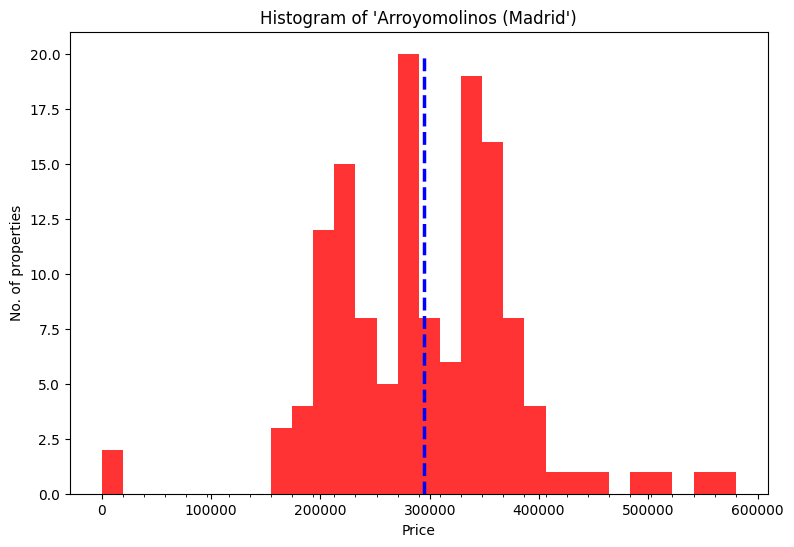

In [ ]:
# DataFrame with given condition "Arroymolinos" and a single column specified
df_Arroy = df.loc[df['level5'] == "Arroyomolinos (Madrid)", ['price']]

# Plotting
plt.figure(figsize=(9,6))
counts, bins, patches = plt.hist(df_Arroy['price'], bins=30, color='red', alpha=0.8) # 'counts' is the count in each bin, 'bins' is the lower-limit of each bin
plt.title("Histogram of 'Arroyomolinos (Madrid')")
plt.xlabel("Price")
plt.ylabel("No. of properties")

# Ticks showing bins used
axes = plt.gca()
axes.xaxis.set_minor_locator(ticker.FixedLocator(bins))

# Vertical dashed line in the mean value
plt.plot([mean,mean],[0,20], '--b', linewidth=2.5)

plt.show()

> **Histogram analysis:**
What we can see at first sight is how properties cluster around the mean price (blue dashed line) in Arroymolinos (Madrid). This suggests that this population follows a *normal distribution*.

In [ ]:
# Which 'bin' contains the mean value?
a = bins < mean
print(a)
for i in range(len(a)):
  if a[i] == True: # indices where bins are minor than mean
    print(i)
print(f"mean value is between bins: [{a[15]},{a[16]}]")
print(counts[14]) # Has the maximum count of all bins (one bin before mean)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False False False False False]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
mean value is between bins: [True,False]
20.0


**Exercise 09.** Are the average prices of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about them.

In [ ]:
# Sub-datasets for populations of interest
df_Val = df.loc[df['level5'] == "Valdemorillo"]
mean_Val = df_Val['price'].mean()

df_Gal = df.loc[df['level5'] == "Galapagar"]
mean_Gal = df_Gal['price'].mean()

# Comparition
print(f"The average price in population 'Valdemorillo' is ${mean_Val}")
print(f"The average price in population 'Galapagar' is ${mean_Gal}")

if mean_Val > mean_Gal:
  print("\nThe average price of properties in 'Valdemorillo' is higher than the average price of 'Galapagar'.")
else:
  print("\nThe average price of properties in 'Galapagar' is higher than the average price of 'Valdemorillo'.")

print(f"\nOBSERVATION: There are {df_Val['price'].count()} houses in 'Valdemorillo' population and {df_Gal['price'].count()} houses in 'Galapagar'.")
print("Houses in 'Valdemorillo' are more valuable?")

The average price in population 'Valdemorillo' is $363860.2931034483
The average price in population 'Galapagar' is $360063.20238095237

The average price of properties in 'Valdemorillo' is higher than the average price of 'Galapagar'.

OBSERVATION: There are 58 houses in 'Valdemorillo' population and 84 houses in 'Galapagar'.
Houses in 'Valdemorillo' are more valuable?


**Exercise 10.** Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called pps (price per square meter) and then analyze the values.

In [ ]:
# Adding a column (price/m2) to a DataFrame
V = df_Val[['surface', 'price']].assign(price_per_m2 = df_Val['price'] / df_Val['surface'])
G = df_Gal[['surface', 'price']].assign(price_per_m2 = df_Gal['price'] / df_Gal['surface'])

# Mean of price/m2
V_mean = V['price_per_m2'].mean()
G_mean = G['price_per_m2'].mean()

# Conclusion
print(f"The average price per square meter in population 'Valdemorillo' is ${V_mean}")
print(f"The average price per square meter in population 'Galapagar' is ${G_mean}")

if V_mean > G_mean:
  print(f"\nThe average price per square meter in 'Valdemorillo' is ${V_mean - G_mean} higher than 'Galapagar'.")
else:
  print(f"\nThe average price per square meter in 'Galapagar' is ${G_mean - V_mean} higher than 'Valdemorillo'.")

The average price per square meter in population 'Valdemorillo' is $1317.9502109024986
The average price per square meter in population 'Galapagar' is $1606.3240303094024

The average price per square meter in 'Galapagar' is $288.37381940690375 higher than 'Valdemorillo'.


> **OBSERVATION:** Despite the fact that the average price per square meter in 'Galapagar' is higher than 'Valdemorillo', and 'Galapagar' also has more entries (properties); the average price in 'Valdemorillo' remains higher than 'Galapagar'. This may be due to properties in 'Valdemorillo' having larger surface areas.

In [ ]:
# Do 'Valdemorillo' and 'Galapagar' have any NaN values?
print("Columns with NaN values:\n")
print(f"Galapagar: \n{G.isna().any()}")
print(f"\nValdemorillo: \n{V.isna().any()}")

# Number of non-NaN values per column
print("\nNumber of values per column:\n")
print(f"Galapagar: \n{G.count()}")
print(f"\nValdemorillo: \n{V.count()}")

# Average surface
print(f"\nGalapagar average surface: {G['surface'].mean()} m2")
print(f"Valdemorillo average surface: {V['surface'].mean()} m2")

Columns with NaN values:

Galapagar: 
surface          True
price           False
price_per_m2     True
dtype: bool

Valdemorillo: 
surface          True
price           False
price_per_m2     True
dtype: bool

Number of values per column:

Galapagar: 
surface         75
price           84
price_per_m2    75
dtype: int64

Valdemorillo: 
surface         53
price           58
price_per_m2    53
dtype: int64

Galapagar average surface: 305.52 m2
Valdemorillo average surface: 350.0188679245283 m2


**Exercise 11.** Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a scatter plot, then write a conclusion about it.

In [ ]:
# Check columns in Valdemorillo having the same size
if len(V['surface'].isna()) - len(V['price'].isna()) == 0:
  print(f"Population 'Valmorillo' has the SAME number of entries in 'surface' and 'price'.")

# Finding the NaN-entries in 'surface'
print("\nThe missing entries in 'Valdemorillo' are:")
print(V.index[V['surface'].isna() == True])

# Replacing missing values by zero
aux = V.copy() # REMEMBER ------> ALWAYS DO A COPY
aux['surface'] = aux['surface'].fillna(0)

Population 'Valmorillo' has the SAME number of entries in 'surface' and 'price'.

The missing entries in 'Valdemorillo' are:
Index([13124, 13737, 13754, 13764, 14911], dtype='int64')


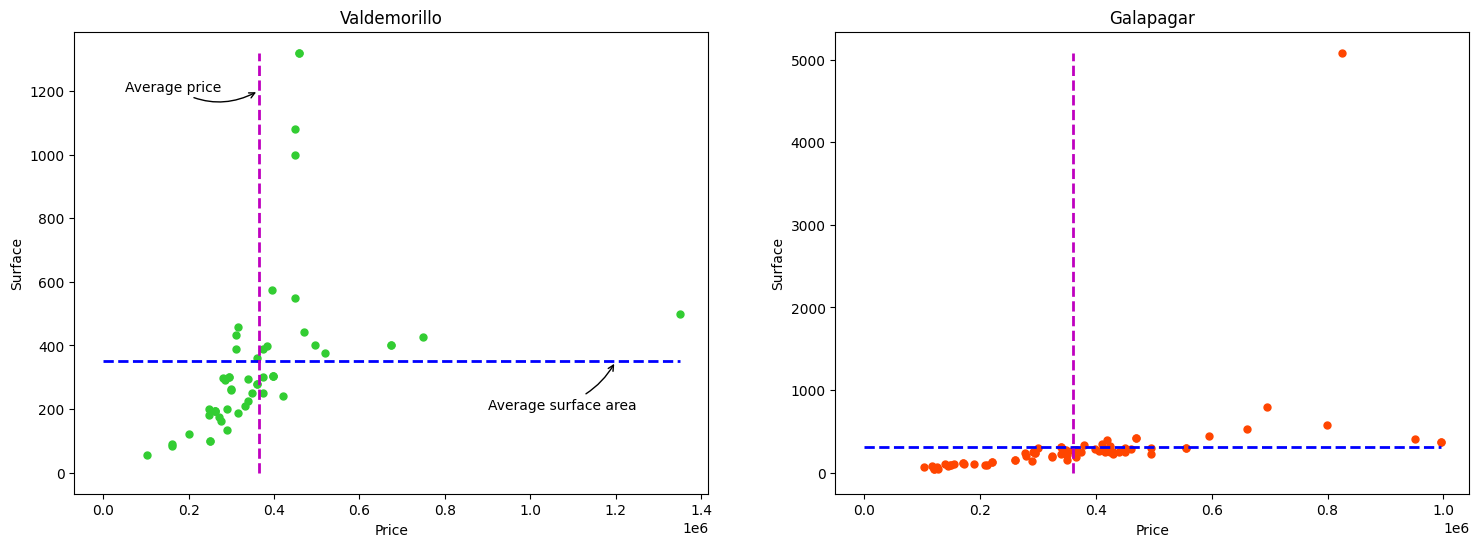

In [ ]:
# Scatter plot 'price' vs. 'surface'
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Valdemorillo
axs[0].scatter(V['price'], V['surface'], s=25, c='limegreen')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Surface')
axs[0].set_title('Valdemorillo')

# Valdemorillo means
axs[0].plot([0,V['price'].max()],[V['surface'].mean(),V['surface'].mean()], '--b', linewidth=2)
axs[0].plot([V['price'].mean(),V['price'].mean()],[0,V['surface'].max()], '--m', linewidth=2)
axs[0].annotate("Average price", xy=(V['price'].mean(),1200), xytext=(50000,1200), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3"))
axs[0].annotate("Average surface area", xy=(1200000,V['surface'].mean()), xytext=(900000,200), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2"))
#axs[0].plot([0,G['price'].max()],[G['surface'].mean(),G['surface'].mean()], '--r', linewidth=2) # Galapagar mean
#axs[0].plot([G['price'].mean(),G['price'].mean()],[0,G['surface'].max()], '--c', linewidth=2)   # Galapagar mean



# Galapagar
axs[1].scatter(G['price'], G['surface'], s=25, c='orangered')
axs[1].set_xlabel("Price")
axs[1].set_ylabel("Surface")
axs[1].set_title("Galapagar")

# Galapagar means
axs[1].plot([0,G['price'].max()],[G['surface'].mean(),G['surface'].mean()], '--b', linewidth=2)
axs[1].plot([G['price'].mean(),G['price'].mean()],[0,G['surface'].max()], '--m', linewidth=2)

plt.show()

> **CONCLUSION:** We can now see that 'Valdemorillo' has more properties with above-average surface and price. Therefore, properties in 'Valdemorillo' are more valuable.

* It is also worth noting that 'Valdemorillo' has properties with above-average surface area but at lower price (THE BEST - 2nd quadrant, counterclockwise), in contrast to 'Galapagar', which does not.
* Additionally, the largest house in 'Valdemorillo' has an acceptable price (not much higher than the average).
* 'Galapagar' has a bunch of properties in the WORST quadrant (4th, counterclockwise): below average surface area and more expensive.

> Finally, 'Valdemorillo' appears to be a better choice for purchasing a house.

In [ ]:
# The best house in 'Valdemorillo'
best = V['surface'].idxmax()
print(f"The {df.iloc[best]['Unnamed: 0']}-property at {df.iloc[best]['address']} is the largest in 'Valdemorillo' ({df.iloc[best]['surface']} m2) and it's priced at just ${df.iloc[best]['price'] - V['price'].mean()} above the population average price of ${V['price'].mean()}.")


The 6963-property at Calle Amapolas, 19, Valdemorillo is the largest in 'Valdemorillo' (1320.0 m2) and it's priced at just $95139.70689655171 above the population average price of $363860.2931034483.


Text(0.5, 1.0, 'Nothing interesting thought...')

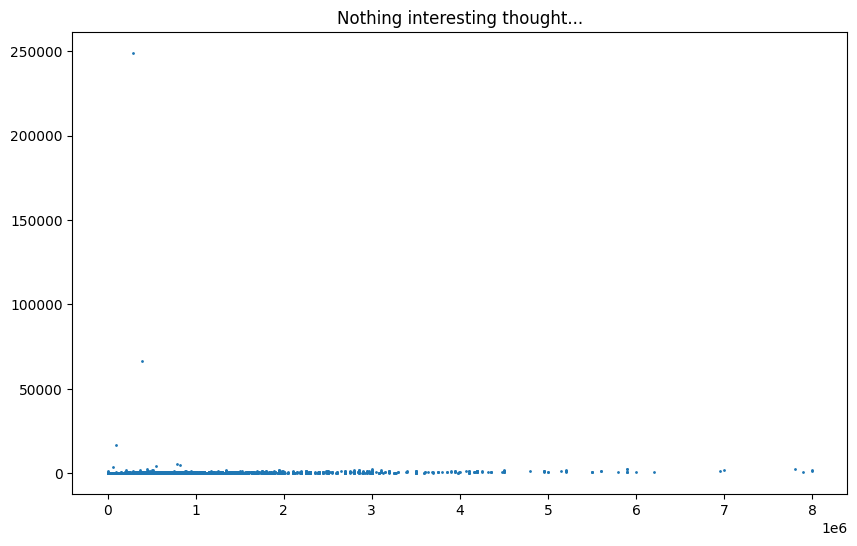

In [ ]:
# All populations scatter-plot
plt.figure(figsize=(10,6))
plt.scatter(df['price'],df['surface'], s=1)
plt.title("Nothing interesting thought...")

**Exercise 12.** How many real estate agencies does the dataset contain? (★★☆)

Print the obtained value.

In [ ]:
# Columns involving real estate agencies: 'id_realEstates' 'realEstate_name'
a = df['realEstate_name'].nunique()
id = df['id_realEstates'].nunique() # Unused

agencies = df['realEstate_name'].dropna().unique()

print(f"There are {a} agency names in the dataset. These are:\n")
print(', '.join(agencies))

There are 1821 agency names in the dataset. These are:

ferrari 57 inmobiliaria, tecnocasa fuenlabrada ferrocarril, look find boadilla, expimad, modesta, inmobiliaria nuevo leganes, gm house, alia consulting inmobiliario sl, tecnocasa navalcarnero, mejocasa, fisol, oih, mario, matibo, isabel, isidro paris molano, ruben, david perez, myriam curiel, jorge, particular, engels volkers sanchinarro, jaime valcarce consulting inmobiliario, inmobiliaria reylank propiedades, altter, spi real estate, nozar sa, vivienda2, vivantial, ingescasa, nurin, egido real estate, zona madrid, fincas fernandez, cr homes, century 21 antilla, esalje, sinergical inmobiliaria, donpiso pozuelo, housfy real estate aicat 7922, viviendas365com, jacqueline alvarez servicios inmobiliarios, arqlia propiedades singulares, soluciones tengacasa, aj servicios inmobiliarios, gilmar mirasierra, bargan, castellana all real estate, inmoelite, sierra noroeste de madrid, tecnocasa villanueva del pardillo, area uno asesores inmob

**Exercise 13.** Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.

In [ ]:
n = df['level5'].shape[0] # Total entries in 'level5' --->len()

# All differents populations
populations = df['level5'].dropna().unique()
m = populations.shape[0]

# Number of houses at each population
N_houses = {} # This is a dictionary
print("POPULATIONS:\n")
for i in range(m):
  N_houses[i] = df.loc[df['level5'] == populations[i], 'Unnamed: 0'].nunique() # Each value in 'Unnamed: 0' is different ----> unique number of elements (.nunique) is the number of houses in the population
  print(f"{N_houses[i]} - {populations[i]}") # N_houses y populations have the same order and lenght

# Dict to Series for data manipulation
houses = pd.Series(N_houses)

most_houses = houses.idxmax() # label
print(f"\nThe population '{populations[most_houses]}' contains the greatest number of properties: {houses[most_houses]}")

POPULATIONS:

206 - Arganda del Rey
233 - Fuenlabrada
275 - Boadilla del Monte
383 - Las Rozas de Madrid
6643 -  Madrid Capital
166 - Villaviciosa de Odón
156 - Pinto
262 - Valdemoro
100 - Navalcarnero
259 - Pozuelo de Alarcón
261 - Torrejón de Ardoz
15 - Navalagamella
280 - San Sebastián de los Reyes
119 - Rivas-vaciamadrid
60 - Alpedrete
325 - Móstoles
48 - San Fernando de Henares
185 - Coslada
16 - Becerril de la Sierra
525 - Alcalá de Henares
21 - Chinchón
272 - Parla
190 - Alcorcón
86 - El Escorial
194 - Leganés
23 - Pedrezuela
148 - Majadahonda
76 - Villanueva de la Cañada
71 - Villanueva del Pardillo
101 - Torrelodones
81 - Moralzarzal
54 - Mejorada del Campo
144 - Aranjuez
8 - Corpa
290 - Getafe
84 - Velilla de San Antonio
18 - Sevilla la Nueva
67 - San Martín de la Vega
64 - Villalbilla
230 - Collado Villalba
259 - Alcobendas
39 - El Molar (Madrid)
15 - Moraleja de Enmedio
43 - Algete
34 - Campo Real
53 - Torrejón de la Calzada
66 - Colmenar Viejo
58 - Valdemorillo
9 - Fuente 

In [ ]:
# Another way... 'value_counts()'
frequent = df['level5'].value_counts() # counts of unique values in descending order
max_houses = frequent.idxmax() # label (population) of the maximum

print(f"The population '{max_houses}' has the greatest amount of houses: {frequent.iloc[0]}") # Maximun is at the first entry
frequent

The population ' Madrid Capital' has the greatest amount of houses: 6643


,count
level5,
Madrid Capital,6643
Alcalá de Henares,525
Las Rozas de Madrid,383
Móstoles,325
Getafe,290
...,...
Fresno de Torote,1
Pinilla del Valle,1
Rascafría,1


**Exercise 14.** Now let's work with the "south belt" of Madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column level5 and the function isin.

In [2]:
# Subset with given condition
condition = df['level5'].isin(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']) # DataFrame of booleans showing whether each element in df['level5'] is contained in given values
south_belt = df[condition]

south_belt

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,...,0,0,0,0,0,1,"40,35059","-3,82693",NaN,NaN
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,...,0,0,0,0,0,0,"40,31933","-3,77574",NaN,NaN
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,...,0,0,0,0,0,0,"40,3313411","-3,8313868",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,15276,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,...,0,0,0,0,0,1,"40,31381","-3,83733",NaN,NaN
15291,15292,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,...,0,0,0,0,0,0,"40,3259051","-3,76318",NaN,NaN
15305,15306,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,...,0,0,0,0,0,0,"40,2882193","-3,8098617",NaN,NaN
15322,15323,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,...,0,0,0,0,0,0,"40,28282","-3,78892",NaN,NaN


**Exercise 15.** Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in Exercise 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot.

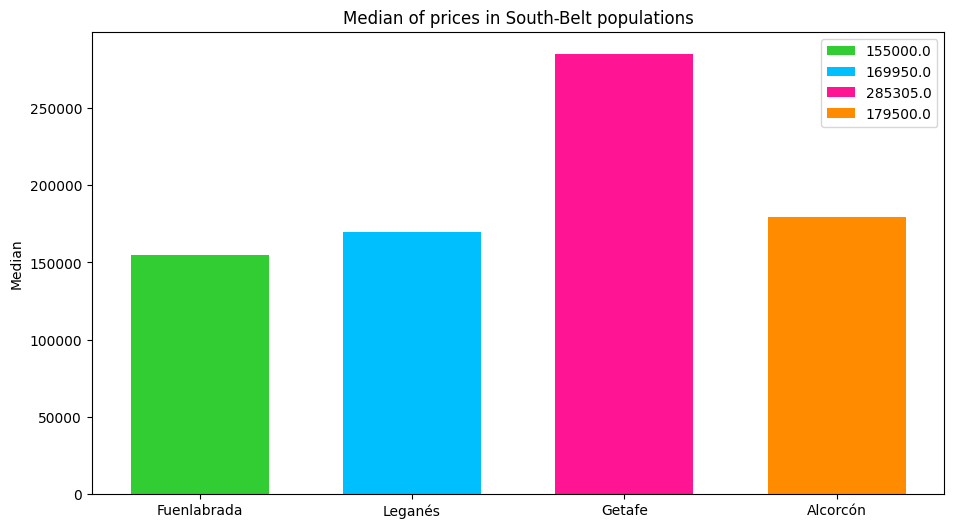

In [ ]:
# DataFrame for each population in south-belt
Fue = south_belt[south_belt['level5'] == 'Fuenlabrada']
Leg = south_belt[south_belt['level5'] == 'Leganés']
Get = south_belt[south_belt['level5'] == 'Getafe']
Alc = south_belt[south_belt['level5'] == 'Alcorcón']

# Median of price: value separating the higher half from the lower half
Fue_median = Fue['price'].median()
Leg_median = Leg['price'].median()
Get_median = Get['price'].median()
Alc_median = Alc['price'].median()

# Bar plot
populations = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']
medians = [Fue_median, Leg_median, Get_median, Alc_median]
bar_colors = ['limegreen', 'deepskyblue', 'deeppink', 'darkorange']

plt.figure(figsize=(11,6))
plt.bar(populations, medians, width=0.65, label=medians, color=bar_colors)
plt.legend()
plt.ylabel("Median")
plt.title("Median of prices in South-Belt populations")
plt.show()

**OBSERVATION:** As we know, the *median* represents the midpoint of our ordered values. Therefore, in each population, 50% of the prices are below this value (the lower half). From this, it is reasonable to think that 'Fuenlabrada' has cheaper properties than the rest. By the same argument, 'Getafe' has higher priced properties than the others.

**Exercise 16.** Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in Exercise 14) (★★★)

Print both values for each variable.

In [ ]:
variables = ['price', 'surface', 'rooms', 'bathrooms']
n = len(variables)

# Sample mean and variance for the whole South Belt
print("Sample mean and Sample variance for South-Belt variables")

for i in range(n):
  mean = south_belt[variables[i]].mean()
  variance = south_belt[variables[i]].var()

  print(f"{variables[i]}:")
  print(f"  mean = {mean}")
  print(f"  variance = {variance}\n") # Normalized by N-1


print("---------------------------------------")
# EXAMPLE: Mean and variance for population 'Getafe'
Get = south_belt[south_belt['level5'] == 'Getafe']
print("Getafe sample mean and sample variance:")

for i in range(n):
  Get_mean = Get[variables[i]].mean()
  Get_var = Get[variables[i]].var()
  print(f"{variables[i]}:")
  print(f"  mean = {Get_mean}")
  print(f"  variance = {Get_var}")

Sample mean and Sample variance for South-Belt variables
price:
  mean = 223094.48070562293
  variance = 14921367508.049023

surface:
  mean = 111.75222363405337
  variance = 4263.051760316343

rooms:
  mean = 3.0177383592017737
  variance = 0.7188858892927564

bathrooms:
  mean = 1.633221850613155
  variance = 0.571796862557738

---------------------------------------
Getafe sample mean and sample variance:
price:
  mean = 265040.5
  variance = 20982665802.243946
surface:
  mean = 126.89626556016597
  variance = 5828.110027662524
rooms:
  mean = 3.1517241379310343
  variance = 0.772747882114307
bathrooms:
  mean = 1.8650519031141868
  variance = 0.6588091118800461


**Exercise 17.** What is the most expensive house in each population? You must use the subset obtained in Exercise 14 (★★☆)

Print both the address and the price of the selected house for each population. You can print a DataFrame or a single line for each population.

In [ ]:
populations = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']
n = len(populations)

# Per line
print("Most expensive house in each population\n")
for i in range(n): # it is not necessary to use: range(n)
  population = south_belt.loc[south_belt['level5'] == populations[i],['price', 'address']] # Selecting just the 'price' and 'address' columns for each population
  label_max = population['price'].idxmax()
  print(f"{populations[i]}: \n  The house at {population.loc[label_max, 'address']} priced at ${population.loc[label_max, 'price']}") # There are non-NaN values


print("-------------------------------------------------------------")


# DataFrame
price = {} #This is a dictionary
addresses = {}

for i in populations:
  population = south_belt.loc[south_belt['level5'] == i, ['price', 'address']]
  label_max = population['price'].idxmax()
  price[i] = population.loc[label_max, 'price']
  addresses[i] = population.loc[label_max, 'address']

pd.DataFrame({'Price of the most expensive house': price, 'Address': addresses})  # Pandas converts each dictionary into series

Most expensive house in each population

Fuenlabrada: 
  The house at Calle de Paulo Freire, 5, Fuenlabrada priced at $490000
Leganés: 
  The house at Avenida Reina Sofía, Leganés priced at $650000
Getafe: 
  The house at Getafe priced at $1050000
Alcorcón: 
  The house at Alcorcón priced at $950000
-------------------------------------------------------------


,Price of the most expensive house,Address
Fuenlabrada,490000,"Calle de Paulo Freire, 5, Fuenlabrada"
Leganés,650000,"Avenida Reina Sofía, Leganés"
Getafe,1050000,Getafe
Alcorcón,950000,Alcorcón


**Exercise 18.** Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in Exercise 14) (★★★)

For the normalization method, you can use the one you consider; there is not a single correct answer to this question. Print the plot and write in a brief analysis about the plot.

Hint: You can help yourself by reviewing the multihist demo of Matplotlib. If you need more help, consult our lesson about [Matplotlib.ipynb](https://github.com/S4qk/Btp-Data-Science/blob/main/Matplotlib.ipynb)  or [Official doc](https://matplotlib.org/stable/users/index.html).

Fuenlabrada price-normalization: 
       Prices   max-min    Zscore       IQR
1       89000  0.000000 -1.286361 -1.047619
3       89000  0.000000 -1.286361 -1.047619
161    239500  0.375312  0.908669  1.341270
214    184000  0.236908  0.099206  0.460317
219    163670  0.186209 -0.197305  0.137619
...       ...       ...       ...       ...
15274  138000  0.122195 -0.571700 -0.269841
15275  138000  0.122195 -0.571700 -0.269841
15305  170000  0.201995 -0.104983  0.238095
15322  112000  0.057357 -0.950908 -0.682540
15325  215000  0.314214  0.551339  0.952381

[233 rows x 4 columns]


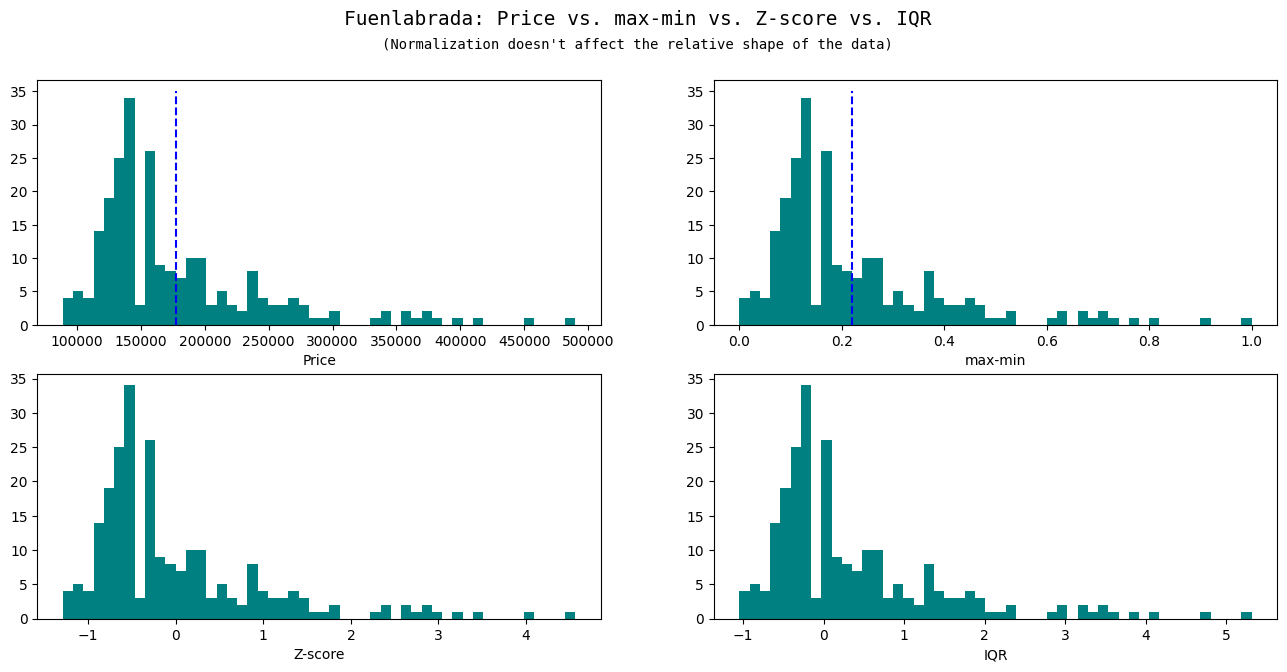

In [ ]:
# In order to select a method of normalization:  Is there any outlier?
Fue = south_belt.loc[south_belt['level5'] == 'Fuenlabrada', 'price'] # Variable of prices for the population

# Normalization by max-min
max = Fue.max()
min = Fue.min()
norm = (Fue - min) / (max - min)

# Standarization
mean = Fue.mean()
std = Fue.std() # standar deviation
Zscore = (Fue - mean) / std

# IQR
q1 = Fue.quantile(0.25)
q2 = Fue.quantile(0.5)
q3 = Fue.quantile(0.75)
IQR = q3 -q1
robust_scaling = (Fue - q2) / IQR

# DataFrame: Methods of normalization
data = pd.DataFrame({'Prices': Fue, 'max-min': norm, 'Zscore': Zscore, 'IQR': robust_scaling})
print(f"Fuenlabrada price-normalization: \n{data}")

# Scatter plot 1row x 2columns
fig, axs = plt.subplots(2,2, figsize=(16,7))
fig.suptitle("Fuenlabrada: Price vs. max-min vs. Z-score vs. IQR", fontsize=14, fontfamily='monospace')
fig.text(0.5, 0.93, "(Normalization doesn't affect the relative shape of the data)", fontsize=10, fontfamily='monospace', ha='center', va='center')

axs[0,0].hist(Fue, bins=50, color='teal')
axs[0,0].plot([Fue.mean(),Fue.mean()],[0,35], '--b', linewidth=1.5) # Vertical dashed line for the mean
axs[0,0].set_xlabel("Price")
axs[0,1].hist(norm, bins=50, color='teal')
axs[0,1].plot([norm.mean(),norm.mean()],[0,35], '--b', linewidth=1.5) # Vertical dashed line for the mean
axs[0,1].set_xlabel("max-min")
axs[1,0].hist(Zscore, bins=50, color='teal')
axs[1,0].set_xlabel("Z-score")
axs[1,1].hist(robust_scaling, bins=50, color='teal')
axs[1,1].set_xlabel("IQR")

plt.show()

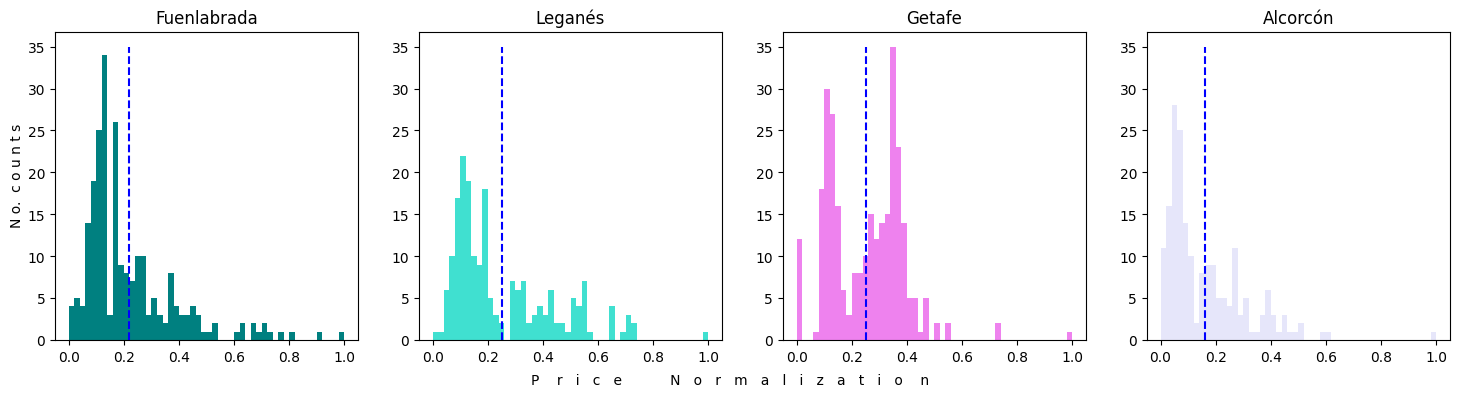

In [ ]:
populations = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']
colors = ['teal', 'turquoise', 'violet', 'lavender']

fig, axs = plt.subplots(1,4, figsize=(18,4)) # Plot with 4-subplots

# Normalization by MAX-MIN to compare in the same range
for j, i in enumerate(populations): # j = label, i = value
  population = south_belt.loc[south_belt['level5'] == i, 'price'] # Variable of prices
  max = population.max()
  min = population.min()
  norm = (population - min) / (max - min) # Normalization
  axs[j].hist(norm, bins=50, color=colors[j]) # Histogram
  axs[j].plot([norm.mean(),norm.mean()],[0,35], '--b', linewidth=1.5) # Vertical dashed line for the mean
  axs[j].set_title(i)
  j =+ 1

fig.text(0.5,0, "P    r   i   c   e           N   o   r   m   a   l   i   z   a   t   i   o    n", fontsize=10, horizontalalignment='center')
fig.text(0.1,0.4, "N o.  c o u n t s", rotation='vertical', fontsize=10)
plt.show()

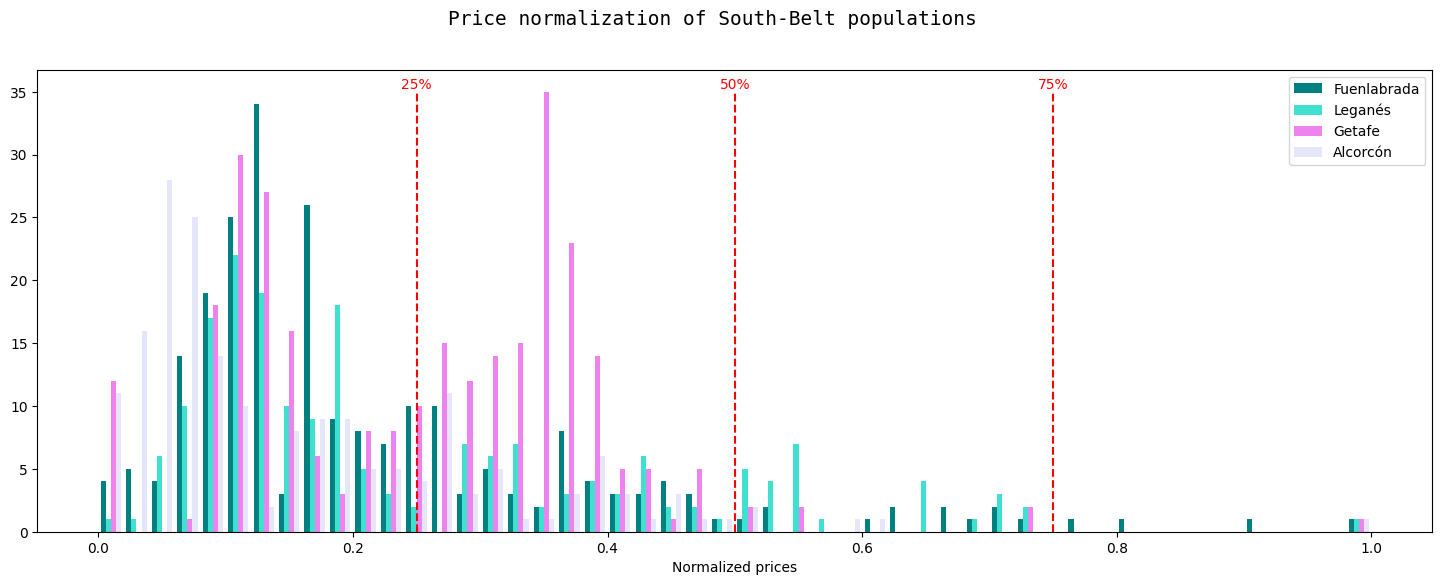

In [ ]:
# from astropy.visualization import hist ----> Bins

populations = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']
colors = ['teal', 'turquoise', 'violet', 'lavender']

# Normalization by MAX-MIN to compare in the same range
norm_populations = [] # This is a list
for i in populations:
  population = south_belt.loc[south_belt['level5'] == i, 'price'] # Variable of prices
  max, min = population.max(), population.min()
  norm = (population - min) / (max - min) # Normalization
  norm_populations.append(norm) # Series to the end of the list

# Histogram
plt.figure(figsize=(18,6))
plt.hist(norm_populations, bins=50, color=colors, label=populations)

# Quartiles
plt.plot([0.25,0.25],[0,35], '--r', linewidth=1.5)
plt.plot([0.5,0.5],[0,35], '--r', linewidth=1.5)
plt.plot([0.75,0.75],[0,35], '--r', linewidth=1.5)

# Legends
plt.suptitle("Price normalization of South-Belt populations", fontsize=14, fontfamily='monospace')
plt.xlabel("Normalized prices")
plt.text(0.25, 35.2, "25%", fontsize=10, color='red', horizontalalignment='center')
plt.text(0.5, 35.2, "50%", fontsize=10, color='red', horizontalalignment='center')
plt.text(0.75, 35.2, "75%", fontsize=10, color='red', horizontalalignment='center')
plt.legend()
plt.show()

> **Observation:** There is a small quantity of properties in each population near the respective maximum price (above 75%), also, most of the properties are below the 25% of their respective maximum. 'Getafe' is the only population where there's a considerable count of properties between 25%-50% of its maximum value.

**Exercise 19.** What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in Exercise 14 (★★☆)

Hint: Create a new column called pps (price per square meter) and then analyze the values.

In [ ]:
populations = ['Getafe', 'Alcorcón']
pps_average = {} # Dictionary
pps = [] # List for DataFrames

for i in populations:
  population = south_belt.loc[south_belt['level5'] == i, ['level5', 'price', 'surface']] # df with only three columns
  population['price_per_m2'] = population['price'] / population['surface']  # Adding new column
  pps_average[i] = population['price_per_m2'].mean()
  pps.append(population) # Save a DataFrame for each population to a list

print(f"Populations: \n{pps[0]} \n{pps[1]}") # Sample size differs by 100-elements
pd.DataFrame({'average price per m2': pps_average})

Populations: 
       level5   price  surface  price_per_m2
169    Getafe  290000    195.0   1487.179487
232    Getafe  137400     65.0   2113.846154
233    Getafe  135500     83.0   1632.530120
269    Getafe   99900     62.0   1611.290323
381    Getafe  455000    280.0   1625.000000
...       ...     ...      ...           ...
14999  Getafe  365000    210.0   1738.095238
15002  Getafe  284491    122.0   2331.893443
15034  Getafe  447000    137.0   3262.773723
15087  Getafe  356160    115.0   3097.043478
15117  Getafe  412500    140.0   2946.428571

[290 rows x 4 columns] 
         level5   price  surface  price_per_m2
85     Alcorcón  107000     50.0   2140.000000
109    Alcorcón  425000    142.0   2992.957746
765    Alcorcón  248000    109.0   2275.229358
816    Alcorcón  299000     96.0   3114.583333
827    Alcorcón  119900     65.0   1844.615385
...         ...     ...      ...           ...
14896  Alcorcón  135000     65.0   2076.923077
15144  Alcorcón  330000     93.0   3548.38709

,average price per m2
Getafe,2066.314949
Alcorcón,2239.302480


> **OBSERVATION:** It is clearly that 'Alcorcón', in average, has more expensive square meters. However, from ex15, 'Getafe' has the most expensive median of prices.

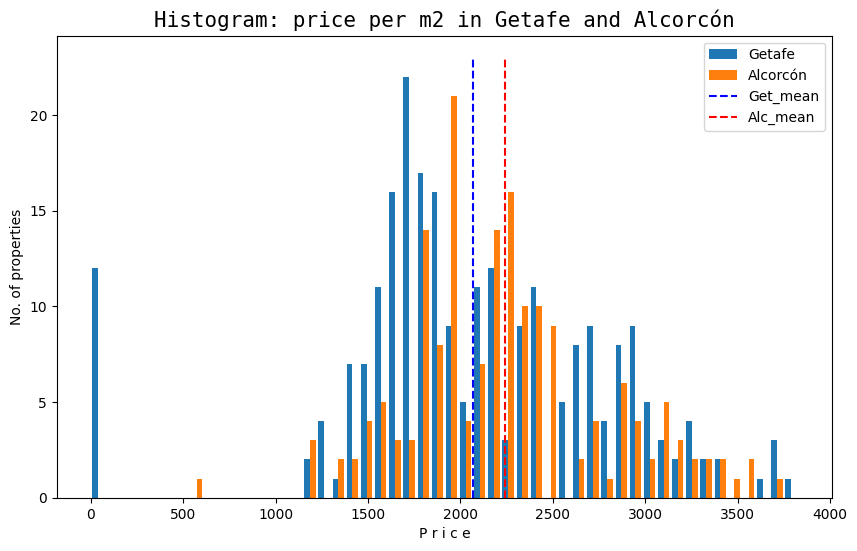

np.int64(49)

In [ ]:
# DataFrames for 'Getafe' and 'Alcorcón'
Get = pps[0]
Alc = pps[1]
Get_mean = pps_average['Getafe']
Alc_mean = pps_average['Alcorcón']

# Plots
data = [Get['price_per_m2'], Alc['price_per_m2']]
plt.figure(figsize=(10,6))
plt.hist(data, bins=50, label=populations) # Histogram price/m2
plt.plot([Get_mean,Get_mean],[0,23], '--b', linewidth=1.5, label='Get_mean')
plt.plot([Alc_mean,Alc_mean],[0,23], '--r', linewidth=1.5, label='Alc_mean')

# Legends
plt.title("Histogram: price per m2 in Getafe and Alcorcón", fontsize=15, fontfamily='monospace')
plt.xlabel("P r i c e")
plt.ylabel("No. of properties")
plt.legend()
plt.show()

# OBS. NaN values are ignored and not included in any of the bins
Get['surface'].isna().sum() # Number of NaN values

> **OBSERVATION:** The data is concentrated between \$1000 - \$4000, with some extreme values far from the central concentrartion.

**Exercise 20.** Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph. You must use the subset obtained in Exercise 14 (★★☆)

Hint: Make a scatter plot of each population using subplots.

In [ ]:
populations = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']
meanspps = {} # Dictionary for populations mean
pps = [] # List for DataFrames

# Obtaining price/m2
for i in populations:
  population = south_belt.loc[south_belt['level5'] == i, ['level5', 'price', 'surface']] # df with only three columns
  population['price_per_m2'] = population['price'] / population['surface']  # Adding new column pps
  meanspps[i] = population['price_per_m2'].mean()
  pps.append(population) # Save a DataFrame for each population to a list

# DataFrames with price/m2
pd.DataFrame({'average price per m2': meanspps})

,average price per m2
Fuenlabrada,1796.729220
Leganés,2047.503268
Getafe,2066.314949
Alcorcón,2239.302480


In [ ]:
# ASIGNA DINAMICAMENTE valores a VARIABLES -------------------------------------------------------------------------------
names_var = ['Fue', 'Leg', 'Get', 'Alc']
for j, pop in enumerate(names_var):
    globals()[pop] = pps[j] # EQUIVALENTE: Fue=pps[0], Leg=pps[1], etc. OR THE BEST OPTION ----> Fue, Leg, Get, Alc = pps
#-------------------------------------------------------------------------------------------------------------------------

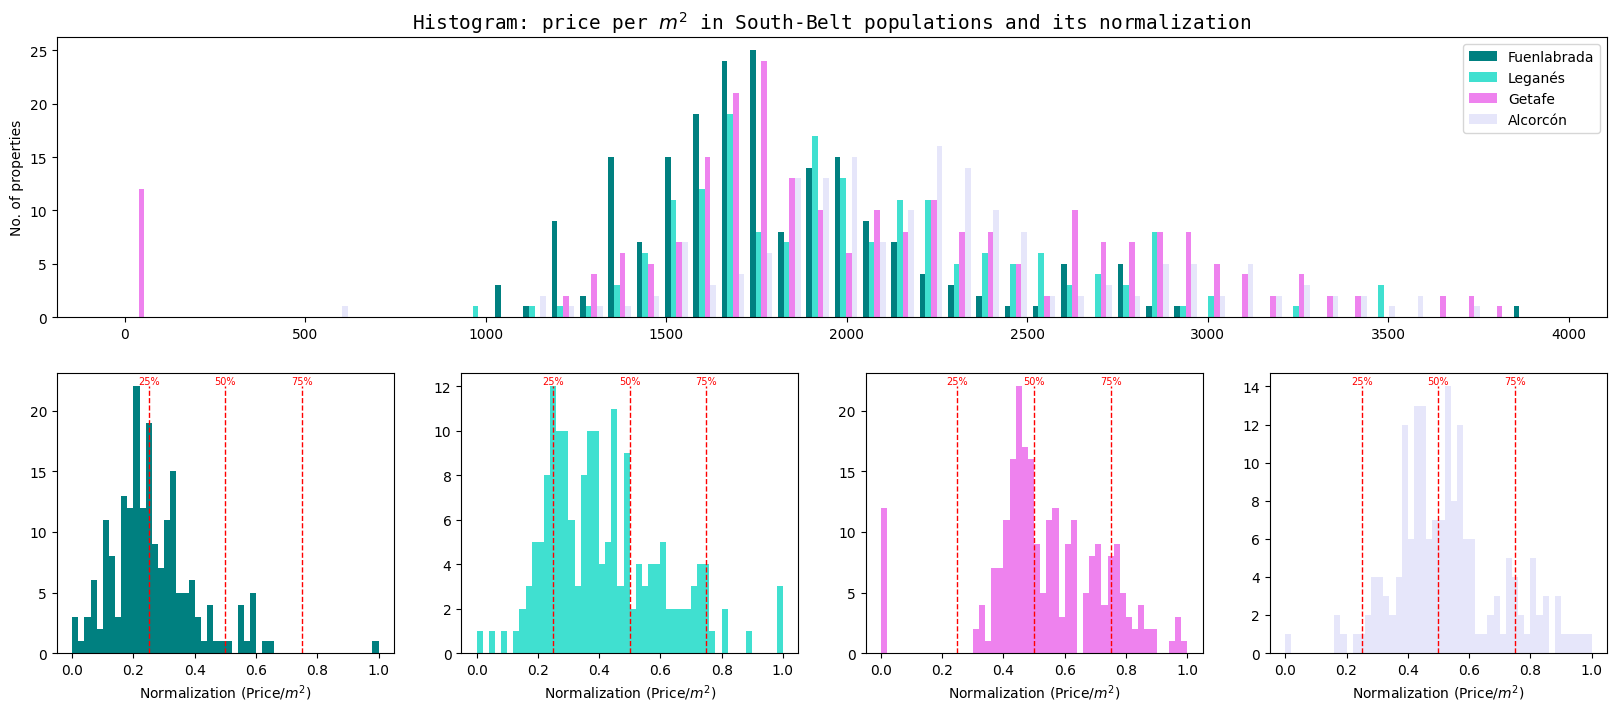

In [ ]:
Fue, Leg, Get, Alc = pps

colors = ['teal', 'turquoise', 'violet', 'lavender']
data = [Fue['price_per_m2'], Leg['price_per_m2'], Get['price_per_m2'], Alc['price_per_m2']] # Variables price/m2
fig = plt.figure(figsize=(20,8))

# Histogram price/m2
ax = fig.add_subplot(211) # Create a 2x1 grid and use the 1st entry
ax.hist(data, bins=50, label=populations, color=colors)
ax.set_title(r'Histogram: price per $m^2$ in South-Belt populations and its normalization', fontsize=14, fontfamily='monospace') # raw-string for LaTex
ax.set_ylabel("No. of properties")
ax.legend()

for i in [1,2,3,4]:
  max = data[i-1].max()
  min = data[i-1].min()
  norm = (data[i-1] - min) / (max - min) # Normalization

  axi = fig.add_subplot(2,4,i+4) # Create a 2x4 grid and use only the 2nd row
  counts, bin_edges, patches = axi.hist(norm, bins=50, color=colors[i-1]) # Histogram for each population
  axi.set_xlabel(r'Normalization (Price/$m^2$)')

  axi.plot([0.25,0.25],[0,counts.max()], '--r', linewidth=1) # Quartiles
  axi.plot([0.5,0.5],[0,counts.max()], '--r', linewidth=1)
  axi.plot([0.75,0.75],[0,counts.max()], '--r', linewidth=1)
  plt.text(0.25, counts.max(), "25%", fontsize=7, color='red', ha='center', va='bottom') # ha=horizontalaligment, va=verticalaligment
  plt.text(0.5, counts.max(), "50%", fontsize=7, color='red', ha='center', va='bottom')
  plt.text(0.75, counts.max(), "75%", fontsize=7, color='red', ha='center', va='bottom')

plt.show()

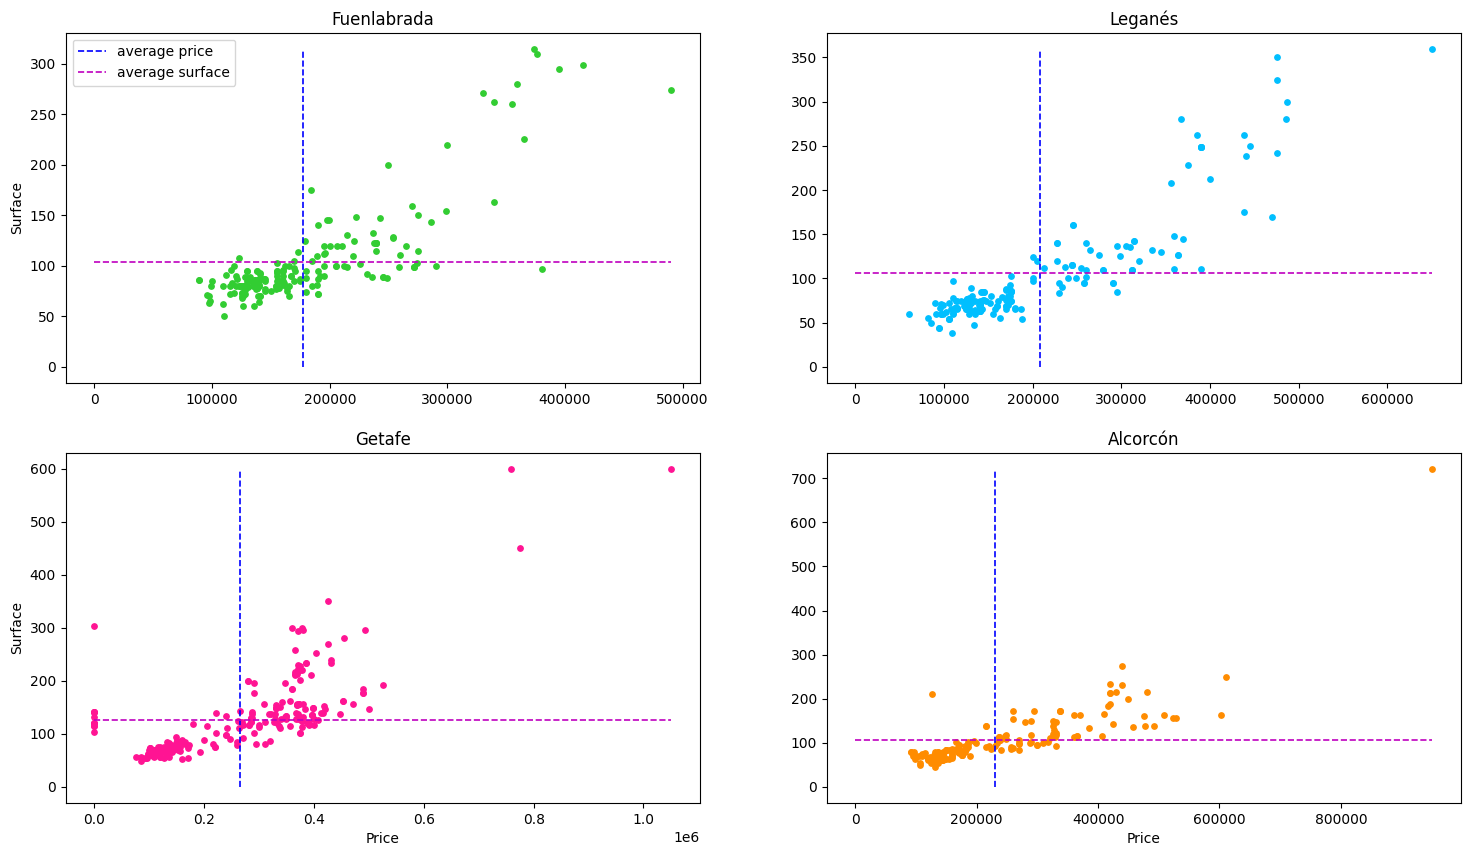

In [ ]:
# 4-scatter plots: price vs. surface
colors = ['limegreen', 'deepskyblue', 'deeppink', 'darkorange']
data_surface = [Fue['surface'], Leg['surface'], Get['surface'], Alc['surface']] # Variables surface
data_price = [Fue['price'], Leg['price'], Get['price'], Alc['price']] # Variables price

fig = plt.figure(figsize=(18,10))

for i in range(4):
  axs = fig.add_subplot(2,2,i+1)
  axs.scatter(data_price[i], data_surface[i], s=15, color=colors[i])
  axs.set_title(populations[i])
  if i % 2 == 0: axs.set_ylabel("Surface")
  if i > 1: axs.set_xlabel("Price") #axs.grid(True)

  axs.plot([data_price[i].mean(),data_price[i].mean()],[0,data_surface[i].max()], '--b', linewidth=1.2, label='average price') # Average price and surface
  axs.plot([0,data_price[i].max()],[data_surface[i].mean(),data_surface[i].mean()], '--m', linewidth=1.2, label='average surface')
  if i == 0: plt.legend(loc='upper left')

plt.show( )

**Exercise 21.** Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map (Here we use another library but it follows similar properties of previous libs, consult [general doc](https://ipyleaflet.readthedocs.io/en/latest/) or [maps & basemaps](https://ipyleaflet.readthedocs.io/en/latest/map_and_basemaps/index.html) for a full or deep understanding).

In [38]:
# Primer acercamiento para hacer un diccionario
for i in populations:
  population = south_belt.loc[south_belt['level5'] == i, coord]
  coordinates = {} # This is a dictionary
  for j in range(2):
    coordinates[j] = population[coord[j]] # lat and lon variables


# Más eficiente ---> to_dict(orient='dict')
# su funcionamiento es:
{
    columna1: { índice1: valor, índice2: valor, ... },
    columna2: { índice1: valor, índice2: valor, ... },
    ...
}
# Se genera un diccionario con keys=columnas
# Cada columna ahora es su propio diccionario con keys=indices

# orient = ‘list’ : dict like {column -> [values]}

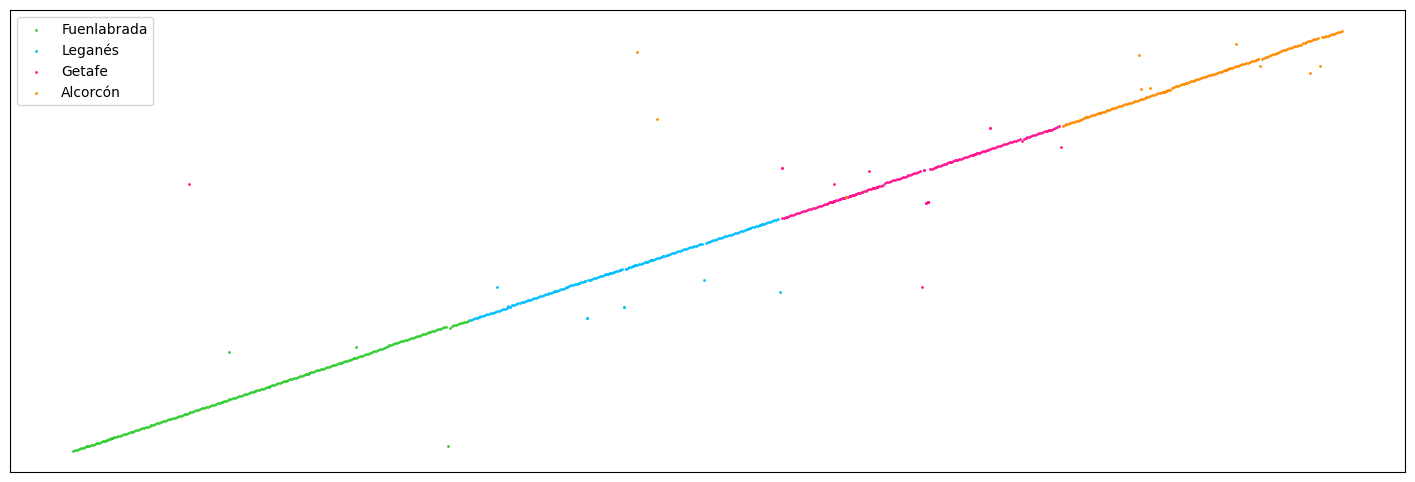

In [58]:
# HERE: plot the coordinates of the estates
# PUT HERE YOUR CODE:

populations = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']
colors = ['limegreen', 'deepskyblue', 'deeppink', 'darkorange']
coord = ['latitude', 'longitude']

plt.figure(figsize=(18,6))
for j, i in enumerate(populations):
  population = south_belt.loc[south_belt['level5'] == i, coord].to_dict('list') # Filter the DataFrame for each population then convert it to a dictionary
  plt.scatter(population['latitude'], population['longitude'], s=1, c=colors[j], label=i)

plt.legend()
plt.xticks([])
plt.yticks([])
plt.show()

In [103]:
# Import the necessary classes from the ipyleaflet library
from ipyleaflet import Map, basemaps

# Create an interactive map centered on the southwest area of Madrid
# center = (latitude, longitude)
# zoom = 11.5: initial zoom level
# min_zoom and max_zoom: limits for zooming in/out
# basemap: OpenStreetMap tile provider (standard street map style)
map = Map(
    center=(40.35, -3.8), # (NORT, WEST)
    zoom=11.5,
    min_zoom=1,
    max_zoom=20,
    basemap=basemaps.OpenStreetMap.Mapnik
)

# Display the map
map

Map(center=[40.35, -3.8], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [104]:
# PUT HERE YOUR CODE:
from ipyleaflet import CircleMarker

populations = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']
colors = ['limegreen', 'deepskyblue', 'deeppink', 'darkorange']
coord = ['latitude', 'longitude']

for i in populations:
  population = south_belt.loc[south_belt['level5'] == i, coord].to_dict('list') # Filter the DataFrame for each population then convert it to a dictionary

c = CircleMarker()
c.location = (40.35, -3.8)
c.radius = 10
c.color = "blue"
c.fill_color = "blue"

map.add(c)

Map(bottom=395835.0, center=[40.35, -3.8], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in…